# Convierto al formato fecha

Analizo el dia y la hora de las vistas y postulaciones

El periodo es 

In [1]:
#importaciones
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
%matplotlib inline 
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
import datetime
sns.set(style="whitegrid") # seteando tipo de grid en seaborn
%matplotlib inline

In [2]:
#leo el csv 
df_vistas = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_3_vistas.csv")
df_postulaciones = pd.read_csv("/home/kevin/Documents/orga datos/datos_navent_fiuba/fiuba_4_postulaciones.csv")
df_vistas.head(3)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd


In [3]:
df_postulaciones.head(3)

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47


In [4]:
df_vistas["timestamp"] = pd.to_datetime(df_vistas["timestamp"])
df_vistas["date"] = df_vistas["timestamp"].dt.date

In [5]:
df_vistas["timestamp"].head(1)

0   2018-02-23 18:38:13.187
Name: timestamp, dtype: datetime64[ns]

In [6]:
df_vistas["month"] = df_vistas["timestamp"].dt.month
df_vistas["month"].value_counts()

2    921074
3     40823
Name: month, dtype: int64

In [7]:
df_vistas["date"].value_counts()

2018-02-27    232145
2018-02-26    227957
2018-02-28    227160
2018-02-24     95930
2018-02-25     90646
2018-02-23     47236
2018-03-01     40823
Name: date, dtype: int64

In [8]:
df_vistas["hour"] = df_vistas["timestamp"].dt.hour
df = df_vistas.groupby("hour").count()#.plot(title = 'postulaciones por hora')

In [9]:
# number of variable
categories = list(df_vistas.groupby("hour").count().index)
#categories = [1,2,3,4,5]
print(categories)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [10]:
df_postulaciones["fechapostulacion"] = pd.to_datetime(df_postulaciones["fechapostulacion"])
df_postulaciones["hour"] = df_postulaciones["fechapostulacion"].dt.hour
df_postulaciones["date"] =df_postulaciones["fechapostulacion"].dt.date
df_postulaciones["weekday"] = df_postulaciones["fechapostulacion"].dt.weekday
df_postulaciones["weekday_name"] = df_postulaciones["fechapostulacion"].dt.weekday_name

In [21]:
df_postulaciones["date"].value_counts()

2018-02-19    137104
2018-02-20    132726
2018-02-21    123054
2018-02-26    122688
2018-02-27    119845
2018-02-28    118296
2018-02-22    105738
2018-01-24     97773
2018-01-30     97352
2018-01-29     96300
2018-01-22     95935
2018-02-15     94184
2018-02-05     91680
2018-01-23     91402
2018-01-15     90934
2018-01-31     88869
2018-01-17     88855
2018-01-16     86954
2018-02-06     85786
2018-02-14     85201
2018-02-23     85024
2018-02-16     83448
2018-01-18     81241
2018-01-25     79867
2018-02-01     77554
2018-02-07     75788
2018-01-26     73446
2018-02-02     69328
2018-01-19     68489
2018-02-08     67579
2018-02-09     66963
2018-02-25     49924
2018-02-13     44363
2018-02-24     43718
2018-02-18     43008
2018-02-17     40588
2018-01-27     35633
2018-01-28     35418
2018-02-04     35350
2018-01-21     35019
2018-02-12     33669
2018-01-20     32711
2018-02-03     32543
2018-02-10     32138
2018-02-11     28138
Name: date, dtype: int64

Text(0.5,1,'Distribubucion de Postulaciones')

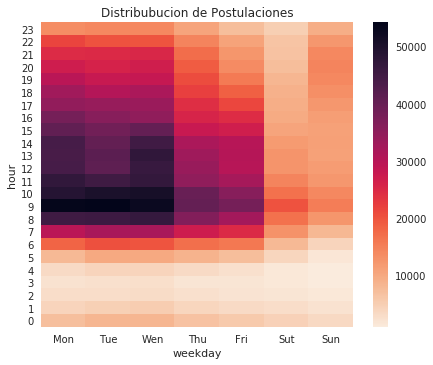

In [11]:
postulaciones_dia_hora = df_postulaciones.groupby(["weekday","hour"])["idaviso",].count()
postulaciones_dia_hora = postulaciones_dia_hora.reset_index()
pivot_post = postulaciones_dia_hora.pivot_table(index= "hour", columns="weekday", values= "idaviso")
pivot_post = pivot_post.sort_index(ascending=False)
plt.figure(figsize=(7,5.6))
cmap = sns.cm.rocket_r
#plt.set_xticklabels(['Mon','Tue','Wen','Thu','Fri','Sut','Sun'])
#plt.xthic(["Lu","Ma","Mi","Ju","Vi","Sa","Do"])
g = sns.heatmap(pivot_post, xticklabels = ['Mon','Tue','Wen','Thu','Fri','Sut','Sun'] ,cmap= cmap)
g.set_title("Distribubucion de Postulaciones")

In [12]:
df_postulaciones.head(2)

,idaviso,idpostulante,fechapostulacion,hour,date,weekday,weekday_name
0,1112257047,NM5M,2018-01-15 16:22:34,16,2018-01-15,0,Monday
1,1111920714,NM5M,2018-02-06 09:04:50,9,2018-02-06,1,Tuesday


In [22]:
date_ini = datetime.date(year=2018,month=2,day=23)
date_fin = datetime.date(year=2018,month=2,day=28)
df_periodo_postulaciones = df_postulaciones[df_postulaciones["date"] >= date_ini]
df_periodo_vistas = df_vistas[(df_vistas["date"] >= date_ini) & (df_vistas["date"] <= date_fin)]

In [23]:
print df_periodo_postulaciones["date"].value_counts()
print df_periodo_vistas["date"].value_counts()

2018-02-26    122688
2018-02-27    119845
2018-02-28    118296
2018-02-23     85024
2018-02-25     49924
2018-02-24     43718
Name: date, dtype: int64
2018-02-27    232145
2018-02-26    227957
2018-02-28    227160
2018-02-24     95930
2018-02-25     90646
2018-02-23     47236
Name: date, dtype: int64


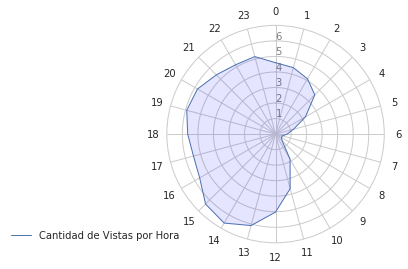

In [24]:
# number of variable
N = len(categories)

from math import pi
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10000,20000,30000,40000,50000,60000], ["1","2","3","4","5","6"], color="grey", size=10)
plt.ylim(0,70000)
 

# Ind2
#values = [10,15,20,13,5]
values = list(df_vistas.groupby("hour")["idAviso"].count())
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Cantidad de Vistas por Hora")
ax.fill(angles, values, 'b', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

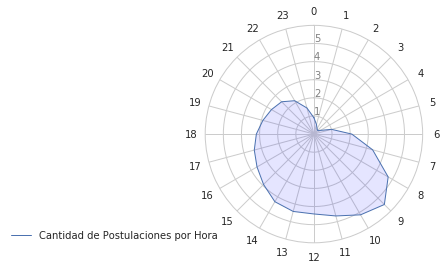

In [16]:
# number of variable
N = len(categories)

from math import pi
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([50000,100000,150000,200000,250000], ["1","2","3","4","5"], color="grey", size=10)
plt.ylim(0,300000)
 

values2 = list(df_postulaciones.groupby("hour")["idaviso"].count())
values2 += values2[:1]
ax.plot(angles, values2, linewidth=1, linestyle='solid', label="Cantidad de Postulaciones por Hora")
ax.fill(angles, values2, 'b', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


comparo las vistas y las postulaciones en el mismo periodo 27y 28 de febrero 

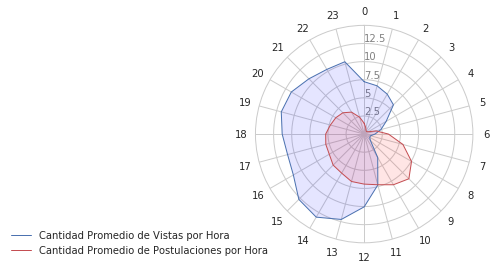

In [72]:
# number of variable
N = len(categories)

def avarage (list):
    for i in range(0,len(list)):
        list[i] = list[i]/((date_fin-date_ini).days)
    
    
from math import pi
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)


# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2500,5000,7500,10000,12500], ["2.5","5","7.5","10","12.5","15"], color="grey", size=10)
plt.ylim(0,15000)

values2 = list(df_periodo_vistas.groupby("hour")["idAviso"].count())
values2 += values2[:1]
avarage(values2)
ax.plot(angles, values2, linewidth=1, linestyle='solid', label="Cantidad Promedio de Vistas por Hora")
ax.fill(angles, values2, 'b', alpha=0.1)



    
values = list(df_periodo_postulaciones.groupby("hour")["idaviso"].count())
values += values[:1]
avarage(values)
ax.plot(angles, values, linewidth=1, linestyle='solid',color = "C2", label="Cantidad Promedio de Postulaciones por Hora")
ax.fill(angles, values, 'r', alpha=0.1)



plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))



Escala en 1.000


esto no me cierra

In [37]:
df_periodo_postulaciones.isnull().any()

idaviso             False
idpostulante        False
fechapostulacion    False
hour                False
date                False
weekday             False
weekday_name        False
dtype: bool

In [38]:
df_periodo_vistas.isnull().any()

idAviso         False
timestamp       False
idpostulante    False
date            False
month           False
hour            False
dtype: bool